In [2]:
import pandas as pd

# 1) Path to CSV
csv_path = "input/star_classification.csv"

# 2) Load into DataFrame
df = pd.read_csv(csv_path)

# 3) Show first few rows, data types, and basic stats
print("Shape:", df.shape)
df.head()
df.info()
df.describe().T

Shape: (100000, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: fl

,count,mean,std,min,25%,50%,75%,max
obj_ID,100000.0,1.237665e+18,8.438560e+12,1.237646e+18,1.237659e+18,1.237663e+18,1.237668e+18,1.237681e+18
alpha,100000.0,1.776291e+02,9.650224e+01,5.527828e-03,1.275182e+02,1.809007e+02,2.338950e+02,3.599998e+02
delta,100000.0,2.413530e+01,1.964467e+01,-1.878533e+01,5.146771e+00,2.364592e+01,3.990155e+01,8.300052e+01
u,100000.0,2.198047e+01,3.176929e+01,-9.999000e+03,2.035235e+01,2.217914e+01,2.368744e+01,3.278139e+01
g,100000.0,2.053139e+01,3.175029e+01,-9.999000e+03,1.896523e+01,2.109983e+01,2.212377e+01,3.160224e+01
r,100000.0,1.964576e+01,1.854760e+00,9.822070e+00,1.813583e+01,2.012529e+01,2.104478e+01,2.957186e+01
i,100000.0,1.908485e+01,1.757895e+00,9.469903e+00,1.773228e+01,1.940514e+01,2.039650e+01,3.214147e+01
z,100000.0,1.866881e+01,3.172815e+01,-9.999000e+03,1.746068e+01,1.900460e+01,1.992112e+01,2.938374e+01
run_ID,100000.0,4.481366e+03,1.964765e+03,1.090000e+02,3.187000e+03,4.188000e+03,5.326000e+03,8.162000e+03
rerun_ID,100000.0,3.010000e+02,0.000000e+00,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02


In [3]:
import numpy as np
from scipy.stats import zscore
# 4. Compute z-scores for numeric features
numeric_cols = df.select_dtypes(include='number').columns

z_scores = df[numeric_cols].apply(zscore)

# 5. Mark any row with |z| > 3 as an outlier
outliers = (np.abs(z_scores) > 3).any(axis=1)
print("Outliers detected:", outliers.sum())

# 6. Drop them
df = df.loc[~outliers].reset_index(drop=True)
print("Shape after outlier removal:", df.shape)

Outliers detected: 4243
Shape after outlier removal: (95757, 18)


In [4]:
from sklearn.preprocessing import LabelEncoder

# 7. Label encoding
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])
print("Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))
# e.g. {'GALAXY': 0, 'QSO': 1, 'STAR': 2}

Mapping: {'GALAXY': np.int64(0), 'QSO': np.int64(1), 'STAR': np.int64(2)}


In [5]:
import numpy as np

# 8. Select only numeric feature columns
feature_cols = df.select_dtypes(include='number').columns.drop('class')
X = df[feature_cols]

# 9. Compute correlation matrix
corr_matrix = X.corr().abs()

# 10. Zero out the diagonal (self‐correlation)
np.fill_diagonal(corr_matrix.values, 0)

# 11. Find feature pairs with corr > 0.9
high_corr = np.where(corr_matrix > 0.9)
high_corr_pairs = [
    (feature_cols[i], feature_cols[j], corr_matrix.iloc[i, j])
    for i, j in zip(*high_corr) if i < j
]

print(f"Highly correlated pairs (>0.9):\n{high_corr_pairs}")


Highly correlated pairs (>0.9):
[('obj_ID', 'run_ID', np.float64(0.9999999949840223)), ('g', 'r', np.float64(0.934389958817083)), ('r', 'i', np.float64(0.9674803505290852)), ('r', 'z', np.float64(0.9203214173844535)), ('i', 'z', np.float64(0.9738134132033744)), ('spec_obj_ID', 'plate', np.float64(0.9999999997589816)), ('spec_obj_ID', 'MJD', np.float64(0.9701985451033548)), ('plate', 'MJD', np.float64(0.9701980084582207))]


In [6]:
# 12. Compute each feature’s mean correlation to all others
mean_corr = corr_matrix.mean().sort_values(ascending=False)

# 13. For each pair, drop the feature with the higher mean correlation
to_drop = set()
for f1, f2, _ in high_corr_pairs:
    # whichever has higher average correlation
    to_drop.add(mean_corr.idxmax() if mean_corr[f1] > mean_corr[f2] else mean_corr.idxmax())

print("Features to drop:", to_drop)

# 14. Create a reduced feature DataFrame
selected_cols = [c for c in feature_cols if c not in to_drop]
X_reduced = X[selected_cols]
print("Remaining features:", selected_cols)

Features to drop: {'r'}
Remaining features: ['obj_ID', 'alpha', 'delta', 'u', 'g', 'i', 'z', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'redshift', 'plate', 'MJD', 'fiber_ID']


In [7]:
from sklearn.model_selection import train_test_split

# 15. Define your feature matrix X and target vector y
X = df[selected_cols]


y = df['class']

# 16. Perform a stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X,                              # features
    y,                              # target
    test_size=0.20,                 # 20% held out for testing
    random_state=42,                # for reproducibility
    stratify=y                      # preserve class proportions
)

# 17. Inspect the splits
print("Training set:", X_train.shape, "samples")
print("Test set:    ", X_test.shape,  "samples")

# 18. Verify class balance
import numpy as np
train_counts = np.bincount(y_train)
test_counts  = np.bincount(y_test)
labels       = le.classes_        # ['GALAXY','QSO','STAR']

for i, lbl in enumerate(labels):
    print(f"{lbl:6s} — train: {train_counts[i]:5d} ({train_counts[i]/len(y_train):.1%}), "
          f"test: {test_counts[i]:5d} ({test_counts[i]/len(y_test):.1%})")


Training set: (76605, 16) samples
Test set:     (19152, 16) samples
GALAXY — train: 46212 (60.3%), test: 11553 (60.3%)
QSO    — train: 13580 (17.7%), test:  3395 (17.7%)
STAR   — train: 16813 (21.9%), test:  4204 (22.0%)


In [8]:
from sklearn.neighbors import KNeighborsClassifier

# 19. Instantiate with k=5 (default Euclidean distance, uniform weights)
knn = KNeighborsClassifier(n_neighbors=5)

# 20. Fit on the training data
knn.fit(X_train, y_train)

# 21. Predict on the test set
y_pred = knn.predict(X_test)

# 22. Evaluate with classification metrics
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy :", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(
    y_test,
    y_pred,
    target_names=le.classes_   # ['GALAXY', 'QSO', 'STAR']
))


Accuracy : 0.7128237259816207

Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.75      0.89      0.81     11553
         QSO       0.50      0.40      0.44      3395
        STAR       0.75      0.47      0.58      4204

    accuracy                           0.71     19152
   macro avg       0.67      0.59      0.61     19152
weighted avg       0.70      0.71      0.70     19152



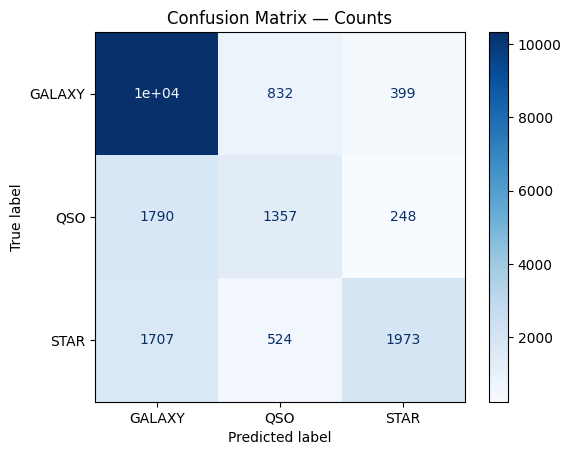

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 33. Plot confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=le.classes_,  # ['GALAXY', 'QSO', 'STAR']
    cmap=plt.cm.Blues,
    normalize=None               # set to 'true' for percentages
)
disp.ax_.set_title("Confusion Matrix — Counts")
plt.show()


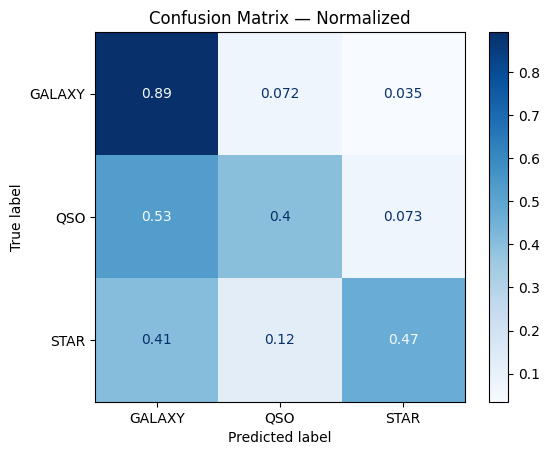

In [10]:
# 34. Normalized (row-wise) to show rates per true class
disp_norm = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=le.classes_,
    cmap=plt.cm.Blues,
    normalize='true'
)
disp_norm.ax_.set_title("Confusion Matrix — Normalized")
plt.show()


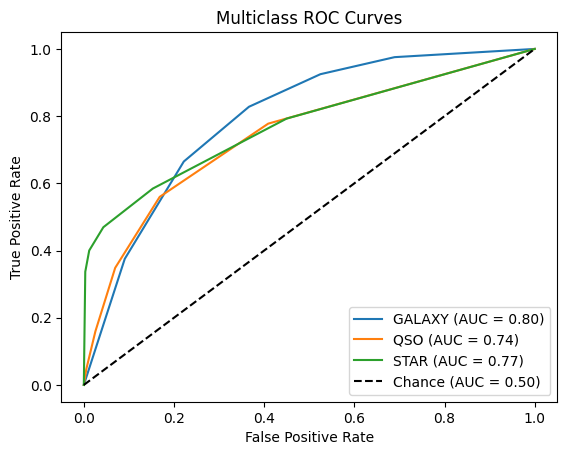

In [11]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# 35. Binarize the true labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0,1,2])
y_score = knn.predict_proba(X_test)

# 36. Compute ROC curve and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i, cls in enumerate(le.classes_):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 37. Plot all ROC curves
plt.figure()
for i, cls in enumerate(le.classes_):
    plt.plot(fpr[i], tpr[i], label=f"{cls} (AUC = {roc_auc[i]:.2f})")
plt.plot([0,1], [0,1], 'k--', label="Chance (AUC = 0.50)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curves")
plt.legend(loc="lower right")
plt.show()


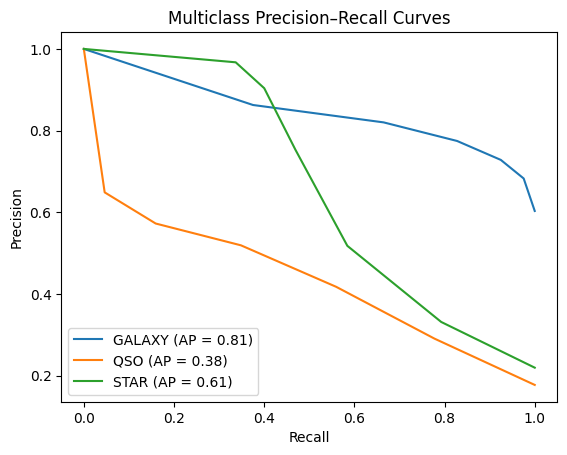

In [12]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# 38. Compute Precision-Recall and AP for each class
precision, recall, ap = {}, {}, {}
for i, cls in enumerate(le.classes_):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    ap[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

# Plot all PR curves
plt.figure()
for i, cls in enumerate(le.classes_):
    plt.plot(recall[i], precision[i], label=f"{cls} (AP = {ap[i]:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Multiclass Precision–Recall Curves")
plt.legend(loc="lower left")
plt.show()


In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, precision_score

# 39. Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights':      ['uniform', 'distance'],
    'p':            [1, 2]           # 1 = Manhattan, 2 = Euclidean
}

# 40. Set up a scorer for macro-averaged precision
precision_macro = make_scorer(precision_score, average='macro')

# 41. Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    cv=5,                     # 5-fold cross-validation
    scoring=precision_macro,  # optimize macro precision
    n_jobs=-1,                # use all cores
    verbose=1
)

# 42. Fit on the training data
grid_search.fit(X_train, y_train)

# 43. Inspect best params and score
print("Best parameters:", grid_search.best_params_)
print("Best CV macro-precision: {:.3f}".format(grid_search.best_score_))

# 44. Re-evaluate on the held-out test set
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score
print("Test accuracy :", accuracy_score(y_test, y_pred_best))
print("\nTest classification report:")
print(classification_report(
    y_test,
    y_pred_best,
    target_names=le.classes_
))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
Best CV macro-precision: 0.685
Test accuracy : 0.7170530492898914

Test classification report:
              precision    recall  f1-score   support

      GALAXY       0.74      0.90      0.81     11553
         QSO       0.52      0.42      0.46      3395
        STAR       0.80      0.45      0.58      4204

    accuracy                           0.72     19152
   macro avg       0.69      0.59      0.62     19152
weighted avg       0.71      0.72      0.70     19152



In [14]:
# 45. Boolean mask of misclassified test instances
mis_mask = (y_test != y_pred_best)

# 46. Extract misclassified vs. correctly classified
X_mis = X_test[mis_mask]
y_mis = y_test[mis_mask]
X_corr = X_test[~mis_mask]
y_corr = y_test[~mis_mask]

print(f"Misclassified: {len(y_mis)} samples")
print(f"Correctly classified: {len(y_corr)} samples")


Misclassified: 5419 samples
Correctly classified: 13733 samples


In [15]:
import pandas as pd

# 47. Pick a few features to compare, e.g., the first five in your selected set
compare_feats = selected_cols[:5]

# 48. For each feature, show summary stats for mis vs. correct
for feat in compare_feats:
    stats = pd.DataFrame({
        'correct_mean': X_corr[feat].mean(),
        'mis_mean':     X_mis[feat].mean(),
        'correct_std':  X_corr[feat].std(),
        'mis_std':      X_mis[feat].std()
    }, index=[feat])
    print(stats, "\n")


        correct_mean      mis_mean   correct_std       mis_std
obj_ID  1.237665e+18  1.237665e+18  8.474119e+12  8.759803e+12 

       correct_mean   mis_mean  correct_std    mis_std
alpha    178.520183  183.17579    96.383446  97.513227 

       correct_mean   mis_mean  correct_std    mis_std
delta     24.041438  26.233952    19.779953  19.193857 

   correct_mean   mis_mean  correct_std   mis_std
u     22.111234  22.009516     2.317931  2.120866 

   correct_mean   mis_mean  correct_std   mis_std
g     20.538991  20.892539     2.102767  1.852075 



In [16]:
# 49. Example assuming SDSS magnitudes named 'u','g','r','i','z' in df
for a, b in [('u','g'), ('g','r'), ('r','i'), ('i','z')]:
    new_col = f"{a}_{b}_color"
    df[new_col] = df[a] - df[b]

# 50. Update feature set
new_features = selected_cols + [f"{a}_{b}_color" for a,b in [('u','g'),('g','r'),('r','i'),('i','z')]]
X_new = df[new_features]


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# 51. Build a pipeline using your best hyperparameters
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn',    KNeighborsClassifier(**grid_search.best_params_))
])

# 52. Split updated data
X_train_new = X_new.loc[X_train.index]
X_test_new  = X_new.loc[X_test.index]

# 53. Retrain & predict
pipeline.fit(X_train_new, y_train)
y_pred_new = pipeline.predict(X_test_new)

# 54. Evaluate
print("=== KNN with color features ===")
print("Accuracy :", accuracy_score(y_test, y_pred_new))
print(classification_report(
    y_test,
    y_pred_new,
    target_names=le.classes_
))


=== KNN with color features ===
Accuracy : 0.9308688387635756
              precision    recall  f1-score   support

      GALAXY       0.93      0.97      0.95     11553
         QSO       0.95      0.87      0.91      3395
        STAR       0.92      0.87      0.90      4204

    accuracy                           0.93     19152
   macro avg       0.93      0.91      0.92     19152
weighted avg       0.93      0.93      0.93     19152



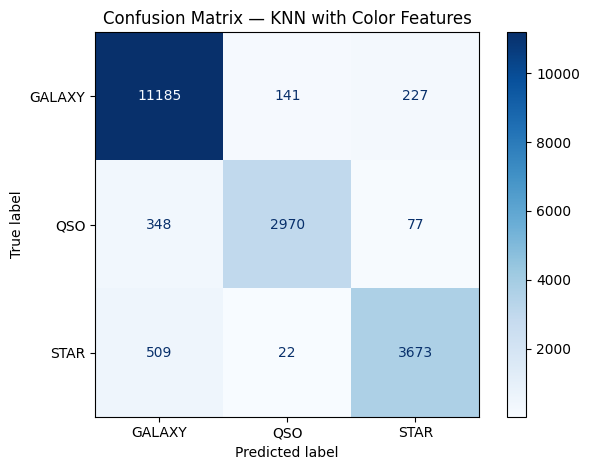

In [20]:
import joblib, pandas as pd
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 55. Serialize the pipeline
joblib.dump(pipeline, "knn_color_pipeline.pkl")

# 56. Export classification report to CSV
report_dict = classification_report(
    y_test,
    y_pred_new,
    target_names=le.classes_,
    output_dict=True
)
report_df = pd.DataFrame(report_dict).T
report_df.to_csv("classification_report.csv", index=True)

# 57. Plot & save confusion matrix
fig, ax = plt.subplots()

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_new,
    display_labels=le.classes_,
    cmap=plt.cm.Blues,
    ax=ax
)
ax.set_title("Confusion Matrix — KNN with Color Features")
fig.tight_layout()
fig.savefig("confusion_matrix.png", dpi=300)


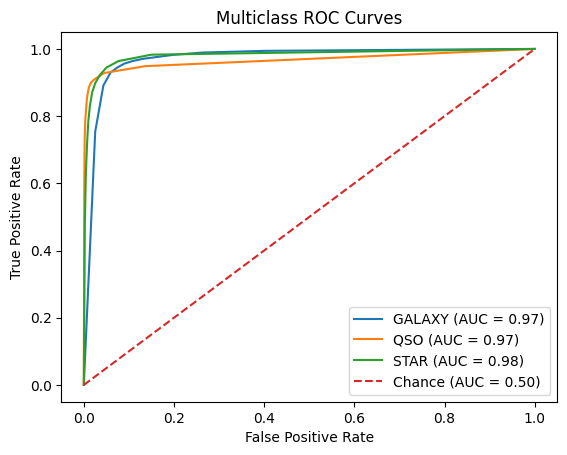

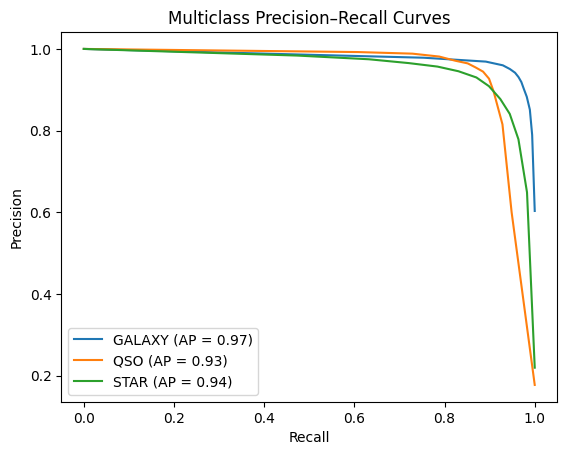

In [19]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt


# 58. Multiclass ROC curves
y_test_bin = label_binarize(y_test, classes=[0,1,2])

y_score_new = pipeline.predict_proba(X_test_new)

fpr, tpr, roc_auc = {}, {}, {}
for i, cls in enumerate(le.classes_):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_new[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i, cls in enumerate(le.classes_):
    plt.plot(fpr[i], tpr[i], label=f"{cls} (AUC = {roc_auc[i]:.2f})")
plt.plot([0,1], [0,1], '--', label="Chance (AUC = 0.50)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curves")
plt.legend(loc="lower right")
plt.show()

# 59. Multiclass Precision–Recall curves
precision, recall, ap = {}, {}, {}
for i, cls in enumerate(le.classes_):
    precision[i], recall[i], _ = precision_recall_curve(
        y_test_bin[:, i],
        y_score_new[:, i]
    )
    ap[i] = average_precision_score(y_test_bin[:, i], y_score_new[:, i])

plt.figure()
for i, cls in enumerate(le.classes_):
    plt.plot(recall[i], precision[i], label=f"{cls} (AP = {ap[i]:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Multiclass Precision–Recall Curves")
plt.legend(loc="lower left")
plt.show()
